In [1]:
import os
import pickle
import json
from tqdm import tqdm
import numpy as np

results_dir = os.path.join('.', 'results', 'discrimination_baseline')
trial_dirs = [d for d in os.listdir(results_dir)
              if os.path.isdir(os.path.join(results_dir, d))]

Results = {}
for trial_dir in tqdm(trial_dirs):
    with open(os.path.join(results_dir, trial_dir, 'config.json'), 'r') as F:
        config = json.load(F)
    model_name = config['model']
    dataset_name = config['dataset']
    with open(os.path.join(results_dir, trial_dir, 'training_metrics.pickle'), 'rb') as F:
        training_metrics = pickle.load(F)
    if not dataset_name in Results.keys():
        Results.update({dataset_name: {}})
    if not model_name in Results[dataset_name].keys():
        Results[dataset_name].update({model_name: []})
    metrics_to_display = {'training_loss': [np.mean(r['train']['loss']) for _, r in training_metrics.items()],
                          'testing_loss': [np.mean(r['test']['loss']) for _, r in training_metrics.items()]}
    Results[dataset_name][model_name].append(metrics_to_display)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 145.94it/s]


PurduePowerTraceDataset XDeepSca
[{'training_loss': [5.5462728, 3.3500998], 'testing_loss': [5.546243, 2.6982744]}, {'training_loss': [5.546179, 2.2493122], 'testing_loss': [5.5461903, 1.8013502]}]
PurduePowerTraceDataset ResNet1D
[{'training_loss': [5.5462213, 2.2962909], 'testing_loss': [5.5462203, 2.9444542]}, {'training_loss': [5.5461864, 1.8296005], 'testing_loss': [5.5461597, 2.8729548]}]
PurduePowerTraceDataset Linear
[{'training_loss': [5.5464325, 5.505136], 'testing_loss': [5.5464954, 5.5056]}, {'training_loss': [5.5465465, 5.505291], 'testing_loss': [5.5466056, 5.5057263]}]
GooglePowerTraceDataset Linear
[{'training_loss': [5.560824, 5.5414343], 'testing_loss': [5.5608187, 5.550333]}, {'training_loss': [5.5614443, 5.541518], 'testing_loss': [5.561549, 5.5504208]}]
GooglePowerTraceDataset ResNet1D
[{'training_loss': [5.5462227, 5.5532227], 'testing_loss': [5.5462227, 5.5563183]}, {'training_loss': [5.5461893, 5.585988], 'testing_loss': [5.5461893, 5.5889463]}]
GooglePowerTrace

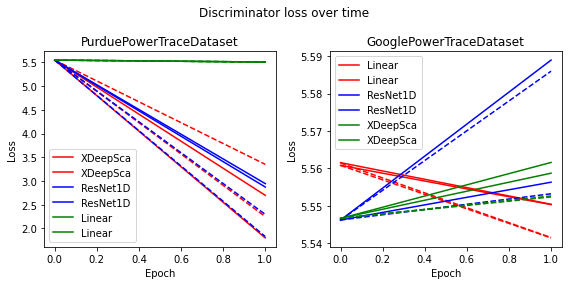

In [2]:
import numpy as np
from matplotlib import pyplot as plt

(fig, axes) = plt.subplots(1, 2, figsize=(8, 4))
for axis_idx, dataset in enumerate(Results.keys()):
    for model, color in zip(Results[dataset].keys(), ['red', 'blue', 'green']):
        print(dataset, model)
        print(Results[dataset][model])
        for curve in Results[dataset][model]:
            axes[axis_idx].plot(curve['training_loss'],
                                linestyle='--',
                                color=color)
            axes[axis_idx].plot(curve['testing_loss'],
                                linestyle='-',
                                color=color,
                                label=model)
    axes[axis_idx].set_xlabel('Epoch')
    axes[axis_idx].set_ylabel('Loss')
    axes[axis_idx].set_title(dataset)
    axes[axis_idx].legend()
fig.suptitle('Discriminator loss over time')
plt.tight_layout()